3


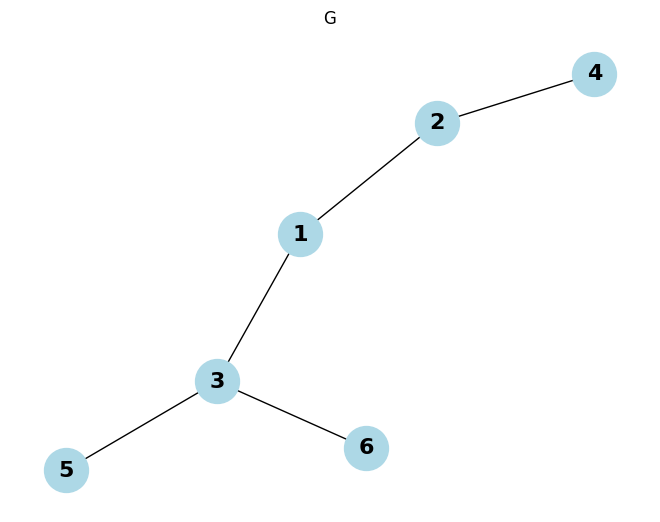

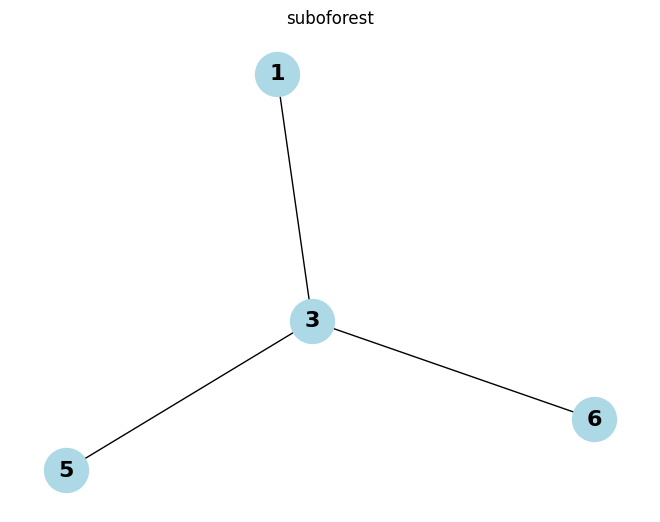

In [14]:
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx


def contains_isomorphic_subtree(graph, H):
    for h in H:
        for sub_nodes in combinations(graph.nodes(), len(h.nodes())):
            subgraph = graph.subgraph(sub_nodes)
            if nx.is_isomorphic(subgraph, h):
                return True
    return False

def maximum_subforest(T, H):
    max_subforest = None
    max_edges = 0

    for num_edges in range(len(T.edges()), 0, -1):
        for edges_subset in combinations(T.edges(), num_edges):
            subgraph = T.edge_subgraph(edges_subset).copy()
            if nx.is_connected(subgraph) and not contains_isomorphic_subtree(subgraph, H):
                if subgraph.number_of_edges() > max_edges:
                    max_edges = subgraph.number_of_edges()
                    max_subforest = subgraph
    
    return max_subforest





G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])

H = []
h1 = nx.Graph()
h1.add_edges_from([(1,2), (1,3),(3,5)])
H.append(h1)



h3 = nx.Graph()
h3.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])
H.append(h3)


h4 = nx.Graph()
h4.add_edges_from([(1,2), (1,3), (2,4), (3,5)])
H.append(h4)


h5 = nx.Graph()
h5.add_edges_from([(1,2), (1,3), (3,5), (3,6)])
H.append(h5)


subforest = maximum_subforest(G,H)

if subforest:
    print(subforest.number_of_edges())
else:
    print("Nema")


nx.draw(G, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("G")
plt.show()


nx.draw(subforest, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("suboforest")
plt.show()
